Importing Libraries

In [92]:
import pandas as pd
import numpy as np
import matplotlib as plt 

Loading the CSV and displaying headers

In [93]:
df = pd.read_csv("C:/Users/Piyush/OneDrive/Desktop/social_media_health_extended_big.csv")
print(df.head())

   age  gender daily_social_hours sleep_hours_avg  anxiety_score  \
0   13  Female                9.4             8.5           8.41   
1   30  Female            2.6 hrs               7           0.00   
2   40    Male          about 0.0             8.2           0.00   
3   52    Male                3.4               6           4.18   
4   28    Male                1.2             NaN           0.00   

   happiness_score screen_time_before_sleep  total_phone_usage_hours  \
0             6.13                      1.1                      5.3   
1            10.00                      0.5                      5.5   
2            10.00                      1.9                      3.7   
3             9.43                   0.5 hr                      1.4   
4             8.92                      NaN                      5.5   

   stress_score primary_platform  study_hours  work_hours  eye_strain_score  \
0          6.36           Reddit          1.1         7.5              1.72   


______________________________________ Data Pre-Preprossesing______________________________________

Dropping Duplicates

In [94]:
df = df.drop_duplicates()


Number extractor
(turning "3 hrs", "about 4", "N/A", "" into numbers)

In [95]:
def clean_number(x):
    x = str(x)

    # treating obvious missing values as NaN
    if x.strip() == "" or x.lower() in ["n/a", "na", "none", "unknown"]:
        return np.nan

    # keeping digits and dots only
    cleaned = ""
    for ch in x:
        if ch.isdigit() or ch == ".":
            cleaned += ch
        else:
            cleaned += " "

    # taking first number
    parts = cleaned.split()
    if parts:
        return float(parts[0])
    else:
        return np.nan

# applying to messy columns
df["daily_social_hours"] = df["daily_social_hours"].apply(clean_number)
df["sleep_hours_avg"] = df["sleep_hours_avg"].apply(clean_number)
df["screen_time_before_sleep"] = df["screen_time_before_sleep"].apply(clean_number)
print(df)


      age  gender  daily_social_hours  sleep_hours_avg  anxiety_score  \
0      13  Female                 9.4              8.5           8.41   
1      30  Female                 2.6              7.0           0.00   
2      40    Male                 0.0              8.2           0.00   
3      52    Male                 3.4              6.0           4.18   
4      28    Male                 1.2              NaN           0.00   
...   ...     ...                 ...              ...            ...   
1044   38  Female                 NaN              7.7           1.51   
1045   34  Female                 5.3              NaN           2.20   
1046   39    Male                 2.9              6.7           1.70   
1048   35    Male                 2.3              7.8           0.38   
1049   27   Other                 6.1              5.6           4.35   

      happiness_score  screen_time_before_sleep  total_phone_usage_hours  \
0                6.13                       1.1

Convert numeric columns using "coerce"

In [96]:
num_cols = [
    "daily_social_hours",
    "sleep_hours_avg",
    "anxiety_score",
    "happiness_score",
    "total_phone_usage_hours",
    "stress_score",
    "study_hours",
    "work_hours",
    "eye_strain_score",
    "mood_score",
    "exercise_minutes_per_week"
]

for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")
print(df)


      age  gender  daily_social_hours  sleep_hours_avg  anxiety_score  \
0      13  Female                 9.4              8.5           8.41   
1      30  Female                 2.6              7.0           0.00   
2      40    Male                 0.0              8.2           0.00   
3      52    Male                 3.4              6.0           4.18   
4      28    Male                 1.2              NaN           0.00   
...   ...     ...                 ...              ...            ...   
1044   38  Female                 NaN              7.7           1.51   
1045   34  Female                 5.3              NaN           2.20   
1046   39    Male                 2.9              6.7           1.70   
1048   35    Male                 2.3              7.8           0.38   
1049   27   Other                 6.1              5.6           4.35   

      happiness_score  screen_time_before_sleep  total_phone_usage_hours  \
0                6.13                       1.1

Fixing unrealistic values

In [97]:
df.loc[df["daily_social_hours"] > 24, "daily_social_hours"] = np.nan
df.loc[df["sleep_hours_avg"] > 24, "sleep_hours_avg"] = np.nan
df.loc[df["total_phone_usage_hours"] > 24, "total_phone_usage_hours"] = np.nan
print(df)

      age  gender  daily_social_hours  sleep_hours_avg  anxiety_score  \
0      13  Female                 9.4              8.5           8.41   
1      30  Female                 2.6              7.0           0.00   
2      40    Male                 0.0              8.2           0.00   
3      52    Male                 3.4              6.0           4.18   
4      28    Male                 1.2              NaN           0.00   
...   ...     ...                 ...              ...            ...   
1044   38  Female                 NaN              7.7           1.51   
1045   34  Female                 5.3              NaN           2.20   
1046   39    Male                 2.9              6.7           1.70   
1048   35    Male                 2.3              7.8           0.38   
1049   27   Other                 6.1              5.6           4.35   

      happiness_score  screen_time_before_sleep  total_phone_usage_hours  \
0                6.13                       1.1

Filling missing numeric values with median

In [98]:
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())
    print(df)

      age  gender  daily_social_hours  sleep_hours_avg  anxiety_score  \
0      13  Female                 9.4              8.5           8.41   
1      30  Female                 2.6              7.0           0.00   
2      40    Male                 0.0              8.2           0.00   
3      52    Male                 3.4              6.0           4.18   
4      28    Male                 1.2              NaN           0.00   
...   ...     ...                 ...              ...            ...   
1044   38  Female                 3.8              7.7           1.51   
1045   34  Female                 5.3              NaN           2.20   
1046   39    Male                 2.9              6.7           1.70   
1048   35    Male                 2.3              7.8           0.38   
1049   27   Other                 6.1              5.6           4.35   

      happiness_score  screen_time_before_sleep  total_phone_usage_hours  \
0                6.13                       1.1


      age  gender  daily_social_hours  sleep_hours_avg  anxiety_score  \
0      13  Female                 9.4              8.5           8.41   
1      30  Female                 2.6              7.0           0.00   
2      40    Male                 0.0              8.2           0.00   
3      52    Male                 3.4              6.0           4.18   
4      28    Male                 1.2              6.9           0.00   
...   ...     ...                 ...              ...            ...   
1044   38  Female                 3.8              7.7           1.51   
1045   34  Female                 5.3              6.9           2.20   
1046   39    Male                 2.9              6.7           1.70   
1048   35    Male                 2.3              7.8           0.38   
1049   27   Other                 6.1              5.6           4.35   

      happiness_score  screen_time_before_sleep  total_phone_usage_hours  \
0                6.13                       1.

Simple cleaning:- gender + platform

In [99]:
df["gender"] = df["gender"].astype(str).str.strip().str.capitalize()
df.loc[df["gender"].isin(["", "Nan"]), "gender"] = "Unknown"

df["primary_platform"] = df["primary_platform"].astype(str).str.strip().str.capitalize()
df.loc[df["primary_platform"].isin(["", "Nan"])] = "Unknown"
print(df)

      age  gender  daily_social_hours  sleep_hours_avg  anxiety_score  \
0      13  Female                 9.4              8.5           8.41   
1      30  Female                 2.6              7.0           0.00   
2      40    Male                 0.0              8.2           0.00   
3      52    Male                 3.4              6.0           4.18   
4      28    Male                 1.2              6.9           0.00   
...   ...     ...                 ...              ...            ...   
1044   38  Female                 3.8              7.7           1.51   
1045   34  Female                 5.3              6.9           2.20   
1046   39    Male                 2.9              6.7           1.70   
1048   35    Male                 2.3              7.8           0.38   
1049   27   Other                 6.1              5.6           4.35   

      happiness_score  screen_time_before_sleep  total_phone_usage_hours  \
0                6.13                       1.1

________________________________________________ Saving New Dataset_______________________________________________

In [100]:
df.to_csv("social_media_health_clean.csv", index=False)

___________________________________________________ Visualisations____________________________________________________

In [101]:
import pandas as pd
import matplotlib.pyplot as plt

# loading cleaned data
df = pd.read_csv("social_media_health_clean.csv")


1) Histogram — Daily Social Media Hours

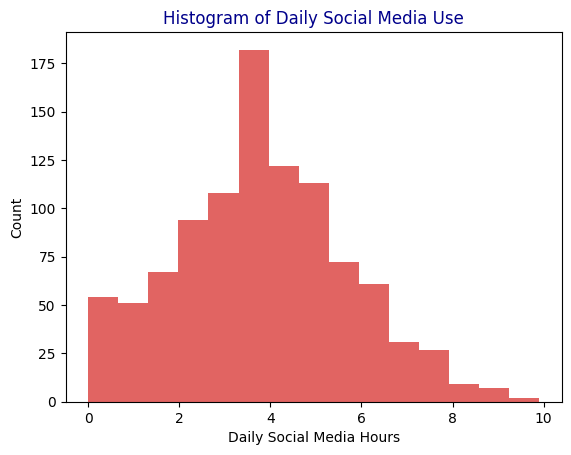

In [102]:
import matplotlib.pyplot as plt

plt.hist(df["daily_social_hours"], bins=15, 
         color=plt.cm.plasma(0.6))   

plt.xlabel("Daily Social Media Hours")
plt.ylabel("Count")
plt.title("Histogram of Daily Social Media Use", color="darkblue")
plt.show()


2) Scatter Plot — Social Media Hours vs Anxiety

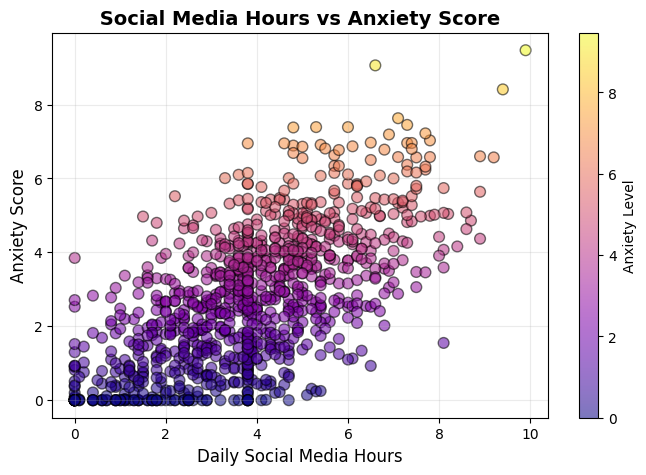

In [103]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

# gradient colour based on values
plt.scatter(df["daily_social_hours"], 
            df["anxiety_score"], 
            c=df["anxiety_score"], cmap="plasma", s=60, alpha=0.55, edgecolors="black")

plt.xlabel("Daily Social Media Hours", fontsize=12)
plt.ylabel("Anxiety Score", fontsize=12)
plt.title(" Social Media Hours vs Anxiety Score ", fontsize=14, fontweight="bold")

plt.colorbar(label="Anxiety Level")   # adds colourful scale bar
plt.grid(alpha=0.25)                 
plt.show()

3) Bar Chart — Mean Happiness per Age Group

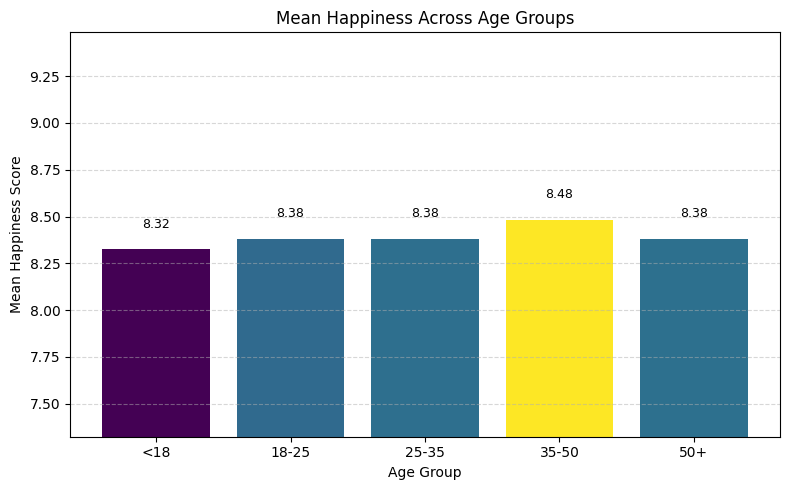

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Creating age groups from age column
df['age_group'] = pd.cut(df['age'], bins=[0, 18, 25, 35, 50, 100], labels=['<18', '18-25', '25-35', '35-50', '50+'])

# Grouping and calculating mean happiness by age group
mean_happiness = df.groupby("age_group", observed=True)["happiness_score"].mean()

# Normalizing values for color gradient
norm = (mean_happiness - mean_happiness.min()) / (mean_happiness.max() - mean_happiness.min())
colors = plt.cm.viridis(norm)

# Plotting
plt.figure(figsize=(8, 5))
bars = plt.bar(mean_happiness.index.astype(str), mean_happiness, color=colors)

# Adding data labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.1, f"{height:.2f}", ha='center', va='bottom', fontsize=9)

# Tight y-axis to exaggerate variation
plt.ylim([mean_happiness.min() - 1, mean_happiness.max() + 1])

# Labels and title
plt.xlabel("Age Group")
plt.ylabel("Mean Happiness Score")
plt.title("Mean Happiness Across Age Groups")
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

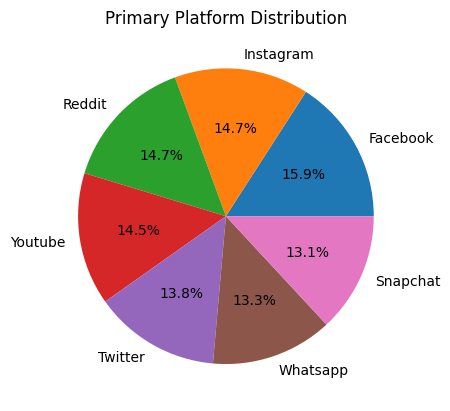

In [105]:
df["primary_platform"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Primary Platform Distribution")
plt.ylabel("")
plt.show()

_____________________________________________________ DATA DESCRIPTION ____________________________________________________________

In [106]:
df.describe()

,age,daily_social_hours,sleep_hours_avg,anxiety_score,happiness_score,screen_time_before_sleep,total_phone_usage_hours,stress_score,study_hours,work_hours,eye_strain_score,mood_score,exercise_minutes_per_week
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,958.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,38.110000,3.822100,6.985100,2.759060,8.402780,1.323486,5.527100,2.554260,3.182600,7.936500,2.75585,5.066370,103.860300
std,15.056779,1.894674,1.221712,1.833133,1.466258,0.762867,2.269212,1.691104,1.883211,1.513998,1.46678,1.361621,55.797238
min,13.000000,0.000000,3.100000,0.000000,3.070000,0.000000,1.000000,0.000000,0.000000,4.000000,0.00000,0.040000,0.000000
25%,25.000000,2.575000,6.200000,1.280000,7.350000,0.800000,3.900000,1.190000,1.800000,7.000000,1.71750,4.187500,64.900000
50%,37.000000,3.800000,6.900000,2.700000,8.665000,1.300000,5.500000,2.555000,3.200000,7.900000,2.74500,5.110000,102.650000
75%,51.000000,5.000000,7.800000,4.040000,9.892500,1.900000,7.100000,3.740000,4.500000,8.800000,3.72250,6.000000,142.650000
max,64.000000,9.900000,10.800000,9.470000,10.000000,3.800000,13.800000,8.670000,9.100000,13.300000,7.81000,8.880000,304.500000


In [107]:
import pandas as pd

# --------------------------------------------------------
# 1. CLEANING: Ensure numeric columns
# --------------------------------------------------------
numeric_cols = [
    "sleep_hours_avg", 
    "daily_social_hours", 
    "total_phone_usage_hours", 
    "stress_score", 
    "anxiety_score"
]

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

df = df.dropna(subset=numeric_cols)

# --------------------------------------------------------
# 2. QUANTILES AND MEANS
# --------------------------------------------------------
sleep_low = df["sleep_hours_avg"].quantile(0.25)
sleep_high = df["sleep_hours_avg"].quantile(0.75)

social_low = df["daily_social_hours"].quantile(0.25)
social_high = df["daily_social_hours"].quantile(0.75)

screen_low = df["total_phone_usage_hours"].quantile(0.25)
screen_high = df["total_phone_usage_hours"].quantile(0.75)

stress_mean = df["stress_score"].mean()
anxiety_mean = df["anxiety_score"].mean()

# --------------------------------------------------------
# 3. CORRELATION MATRIX
# --------------------------------------------------------
print("\nCorrelations:")
display(df.corr(numeric_only=True))



Correlations:


,age,daily_social_hours,sleep_hours_avg,anxiety_score,happiness_score,screen_time_before_sleep,total_phone_usage_hours,stress_score,study_hours,work_hours,eye_strain_score,mood_score,exercise_minutes_per_week
age,1.000000,-0.017475,0.033893,0.008897,0.020093,-0.000486,-0.016544,-0.034780,0.036493,-0.008717,-0.029031,0.023441,0.011937
daily_social_hours,-0.017475,1.000000,-0.016066,0.649635,-0.330167,0.015105,-0.015292,0.700189,-0.045422,0.071325,-0.032334,-0.216971,0.028899
sleep_hours_avg,0.033893,-0.016066,1.000000,-0.010993,0.009312,0.003979,0.030866,-0.015157,0.061825,-0.031614,0.020667,-0.021993,0.002084
anxiety_score,0.008897,0.649635,-0.010993,1.000000,-0.530530,-0.005714,0.010045,0.489085,-0.005103,0.046354,-0.014291,-0.361494,0.031173
happiness_score,0.020093,-0.330167,0.009312,-0.530530,1.000000,-0.006696,-0.027587,-0.263740,-0.032375,0.016135,0.011848,0.665100,-0.005764
screen_time_before_sleep,-0.000486,0.015105,0.003979,-0.005714,-0.006696,1.000000,0.050776,0.047133,0.008913,-0.027624,0.028211,-0.040109,-0.008548
total_phone_usage_hours,-0.016544,-0.015292,0.030866,0.010045,-0.027587,0.050776,1.000000,-0.019055,-0.015000,0.067325,0.736112,-0.021010,-0.010145
stress_score,-0.034780,0.700189,-0.015157,0.489085,-0.263740,0.047133,-0.019055,1.000000,-0.011550,-0.001909,-0.041188,-0.181032,0.008150
study_hours,0.036493,-0.045422,0.061825,-0.005103,-0.032375,0.008913,-0.015000,-0.011550,1.000000,-0.045643,-0.025352,-0.057783,-0.020829
work_hours,-0.008717,0.071325,-0.031614,0.046354,0.016135,-0.027624,0.067325,-0.001909,-0.045643,1.000000,0.062573,-0.015917,0.041938


___________________________________________________________________________________________________________

| Score Range | Interpretation  | Meaning                                                       |
| ----------- | --------------- | ------------------------------------------------------------- |
| *0–3*     | Low Stress      | Calm, relaxed, good coping ability.                           |
| *4–6*     | Moderate Stress | Noticeable worry; workload or life pressure increasing.       |
| *7–10*    | High Stress     | Frequent tension, overwhelm, poor sleep, reduced performance. |

| Score Range | Interpretation   | Meaning                                                               |
| ----------- | ---------------- | --------------------------------------------------------------------- |
| *0–3*     | Low Anxiety      | Minimal worry; emotionally stable.                                    |
| *4–6*     | Moderate Anxiety | Occasional racing thoughts, uneasiness, restlessness.                 |
| *7–10*    | High Anxiety     | Persistent worry, panic symptoms, trouble focusing, physical tension. |

In [111]:
print("\n--- User Health Assessment Interface ---")

# User Inputs with Validation
while True:
    age = int(input("Enter your age: "))
    if 1 <= age <= 120:
        break
    print("Invalid age. Enter a value between 1 and 120.\n")

while True:
    sleep = float(input("How many hours do you sleep per day? "))
    if 0 <= sleep <= 24:
        break
    print("Invalid input. Sleep hours must be between 0 and 24.\n")

while True:
    screen_time = float(input("Daily screen time (in hours): "))
    if 0 <= screen_time <= 24:
        break
    print("Invalid input. Screen time cannot be more than 24 hours.\n")

while True:
    social = float(input("Daily social media usage (in hours): "))
    if 0 <= social <= screen_time:
        break
    print("Invalid input. Social media hours cannot exceed total screen time.\n")

while True:
    stress = float(input("Stress level (0-10): "))
    if 0 <= stress <= 10:
        break
    print("Enter stress between 0 and 10.\n")

while True:
    anxiety = float(input("Anxiety level (0-10): "))
    if 0 <= anxiety <= 10:
        break
    print("Enter anxiety between 0 and 10.\n")


print("\n--- Predicted Health Scores ---")

# Weighted Prediction Model
#reason explained....
predicted_stress = (screen_time * 0.8) + ((8 - sleep) * 1.2) + (social * 0.5)
predicted_stress = max(0, min(predicted_stress, 10))

predicted_anxiety = (predicted_stress * 0.6) + (social * 0.4)
predicted_anxiety = max(0, min(predicted_anxiety, 10))

predicted_eye_strain = (screen_time * 8) + (social * 2)
predicted_eye_strain = max(0, min(predicted_eye_strain, 100))

print(f"Predicted Stress Level (0-10): {predicted_stress:.2f}")
print(f"Predicted Anxiety Score (0-10): {predicted_anxiety:.2f}")
print(f"Predicted Eye Strain (0-100): {predicted_eye_strain:.2f}")


# Evaluation Standards
sleep_low, sleep_high = 6, 9
screen_low, screen_high = 2, 6
social_low, social_high = 1, 4
stress_mean = 5
anxiety_mean = 4.5

print("\n--- Lifestyle Assessment ---")

# Sleep Analysis
if sleep == 0:
    print("Sleep: Very low. Risk of sleep deprivation.")
elif sleep < sleep_low:
    print("Sleep: Low. Recommended 7-9 hours.")
elif sleep > sleep_high:
    print("Sleep: High. Ensure sleep quality is also good.")
else:
    print("Sleep: Normal and healthy range.")

# Screen Time
if screen_time > 10:
    print("Screen Time: Very high. Reduce long continuous usage.")
elif screen_time > screen_high:
    print("Screen Time: Higher than recommended range.")
elif screen_time < screen_low:
    print("Screen Time: Low. Healthy usage.")
else:
    print("Screen Time: Moderate and reasonable.")

# Social Media Usage
if social > 8:
    print("Social Media: Extremely high. Reduction recommended.")
elif social > social_high:
    print("Social Media: High usage. Try lowering gradually.")
elif social < social_low:
    print("Social Media: Low and balanced.")
else:
    print("Social Media: Moderate.")

# Stress
if stress > 8 or predicted_stress > 8:
    print("Stress: Critical. Requires attention.")
elif stress > stress_mean + 1:
    print("Stress: High compared to average.")
elif stress < stress_mean - 1:
    print("Stress: Low and manageable.")
else:
    print("Stress: Moderate.")

# Anxiety
if anxiety > 8 or predicted_anxiety > 8:
    print("Anxiety: Severe. Important to control triggers.")
elif anxiety > anxiety_mean + 1:
    print("Anxiety: High.")
elif anxiety < anxiety_mean - 1:
    print("Anxiety: Low and stable.")
else:
    print("Anxiety: Moderate.")

# Final Health Score
overall_score = 0
if sleep_low <= sleep <= sleep_high: overall_score += 1
if screen_time <= screen_high: overall_score += 1
if social <= social_high: overall_score += 1
if stress <= stress_mean: overall_score += 1
if anxiety <= anxiety_mean: overall_score += 1

print("\n--- Final Health Status ---")
if overall_score <= 2:
    print("Overall Result: Unhealthy. Lifestyle modification needed.")
elif overall_score == 3:
    print("Overall Result: Average lifestyle condition.")
else:
    print("Overall Result: Healthy trends observed.")

print("\nEnd of Report.")



--- User Health Assessment Interface ---

--- Predicted Health Scores ---
Predicted Stress Level (0-10): 5.50
Predicted Anxiety Score (0-10): 4.50
Predicted Eye Strain (0-100): 46.00

--- Lifestyle Assessment ---
Sleep: Normal and healthy range.
Screen Time: Moderate and reasonable.
Social Media: Moderate.
Stress: Moderate.
Anxiety: Moderate.

--- Final Health Status ---
Overall Result: Healthy trends observed.

End of Report.


In [109]:

# Select the two relevant columns
eye = df["eye_strain_score"]
screen = df["total_phone_usage_hours"]

# Calculating correlation (Pearson by default)
correlation = eye.corr(screen)

print("Correlation between Eye Strain and Screen Time:", correlation)

# Interpretation
if correlation > 0:
    print("→ Positive correlation: Higher screen time is associated with higher eye strain.")
elif correlation < 0:
    print("→ Negative correlation: Higher screen time is associated with lower eye strain.")
else:
    print("→ No correlation detected.")

Correlation between Eye Strain and Screen Time: 0.736112183014257
→ Positive correlation: Higher screen time is associated with higher eye strain.


In [110]:

# Selecting the two relevant columns
anxiety = df["anxiety_score"]
sleep = df["sleep_hours_avg"]

# Calculating correlation (Pearson)
correlation = anxiety.corr(sleep)

print("Correlation between Anxiety and Sleep Duration:", correlation)

# Interpretation
if correlation > 0:
    print("→ Positive correlation: Higher sleep hours are associated with higher anxiety.")
elif correlation < 0:
    print("→ Negative correlation: Higher sleep hours are associated with lower anxiety.")
else:
    print("→ No correlation detected.")


Correlation between Anxiety and Sleep Duration: -0.010993061264942807
→ Negative correlation: Higher sleep hours are associated with lower anxiety.


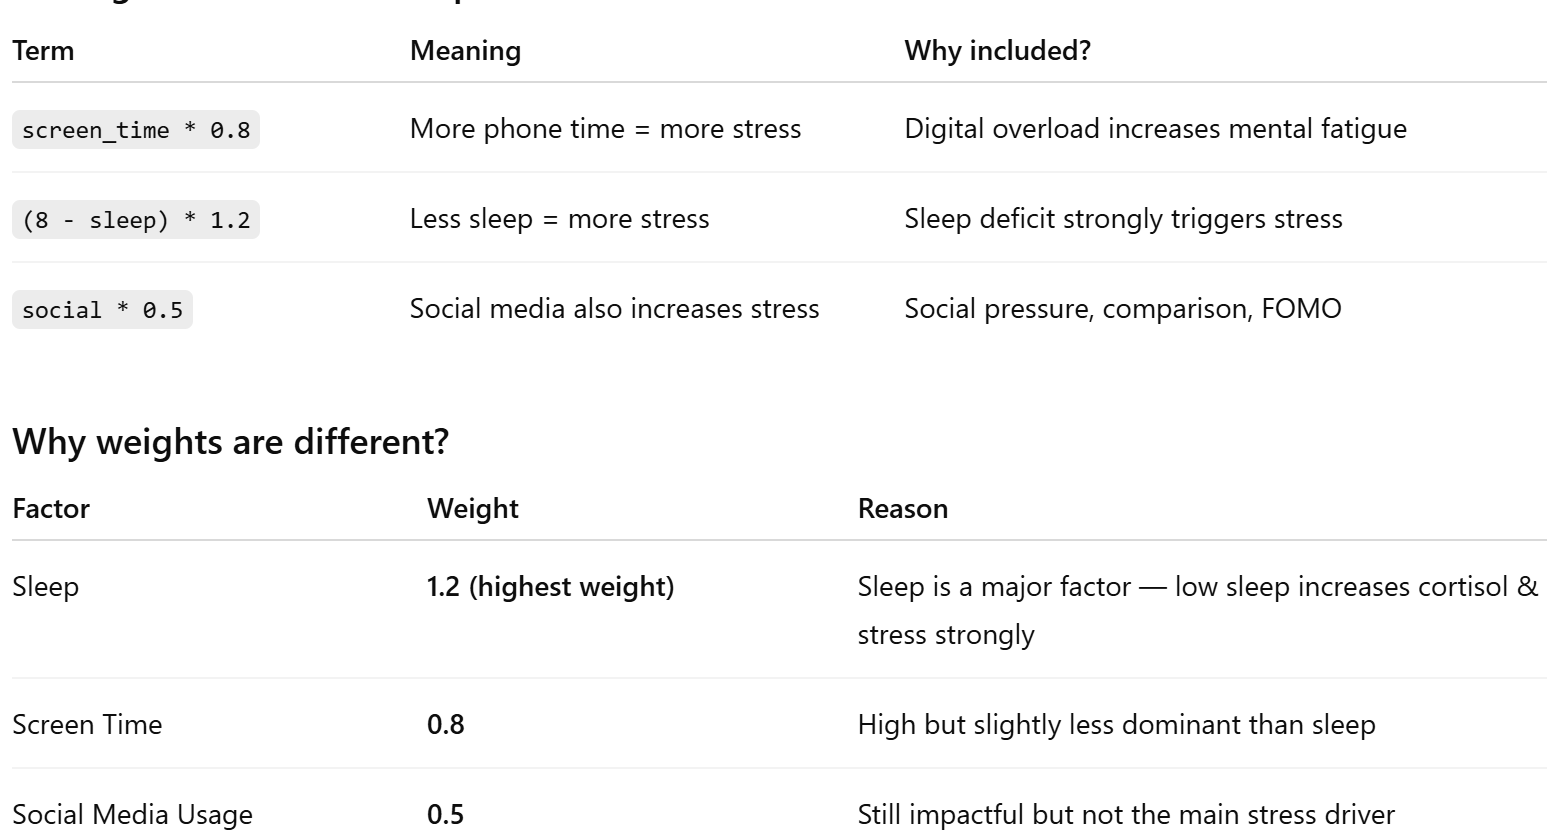